# Regressione Lineare e OLS: un'applicazione pratica

Per prima cosa <b>importiamo le librerie</b> che ci serviranno in seguito:

In [3]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import wooldridge
import statsmodels.api as sm
import seaborn as sns
import numpy as np

### I Dati

Carichiamo il dataset <b>wage1</b> e visualizziamo le prime 5 righe:

In [4]:
df = wooldridge.data("wage1")

df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


Visualizziamo alcune informazioni sulle variabili (media, deviazione standard, minimo, massimo ecc.)

In [5]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


Visualizziamo tramite uno scatterplot e una serie di boxplot la correlazione tra istruzione (educ) e salario (wage):

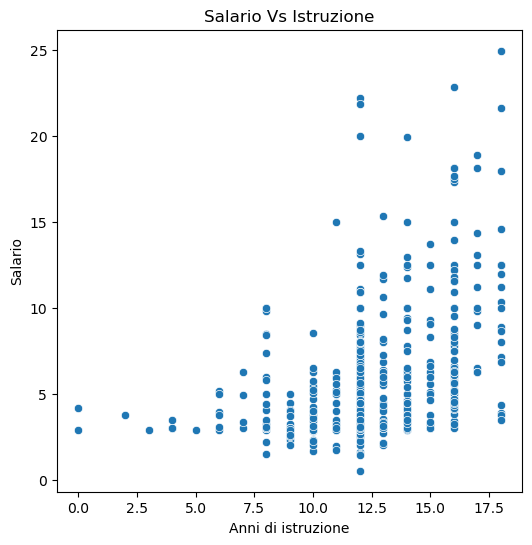

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='educ', y='wage')
plt.title('Salario Vs Istruzione')
plt.xlabel('Anni di istruzione')
plt.ylabel('Salario')
plt.show()

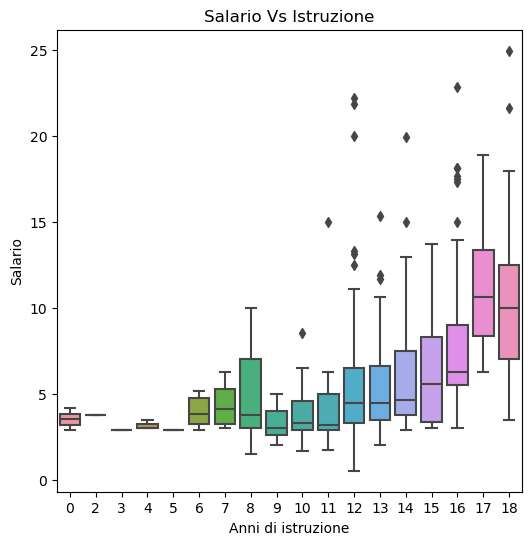

In [24]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='educ', y='wage')
plt.title('Salario Vs Istruzione')
plt.xlabel('Anni di istruzione')
plt.ylabel('Salario')
plt.show()

Osservando i grafici sembrerebbe esserci una correlazione positiva: il salario medio segue un andamento crescente al crescere degli anni di istruzione.

### La Stima
Stimiamo i parametri della <b>regressione lineare semplice</b> utilizzando il modello OLS

In [7]:
x = df['educ']
X = sm.add_constant(x) #aggiunge una costante alla x generando una matrice con 2 colonne x e costante
y = df['wage']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           2.78e-22
Time:                        10:48:56   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

Possiamo anche salvare i parametri stimati in variabili specifiche:

In [8]:
beta_0, beta_1 = model.params

print(beta_0, beta_1)

-0.9048516119572119 0.5413592546651746


Possiamo anche salvare in una variabile i valori di y stimati dalla regressione lineare e visualizzarli:

In [9]:
y_hat = model.fittedvalues

In [10]:
y_hat

0      5.050100
1      5.591459
2      5.050100
3      3.426022
4      5.591459
         ...   
521    7.756896
522    4.508741
523    7.215537
524    7.756896
525    6.674178
Length: 526, dtype: float64

così come i residui, dati dalla differenza tra i valori di y stimati dalla regressione lineare e i valori reali di y che troviamo nel dataset:

In [11]:
e = y - y_hat

e

0     -1.950100
1     -2.351459
2     -2.050100
3      2.573978
4     -0.291459
         ...   
521    7.243104
522   -2.238741
523   -2.545537
524    3.803104
525   -3.174178
Length: 526, dtype: float64

Visualizziamo la retta stimata:

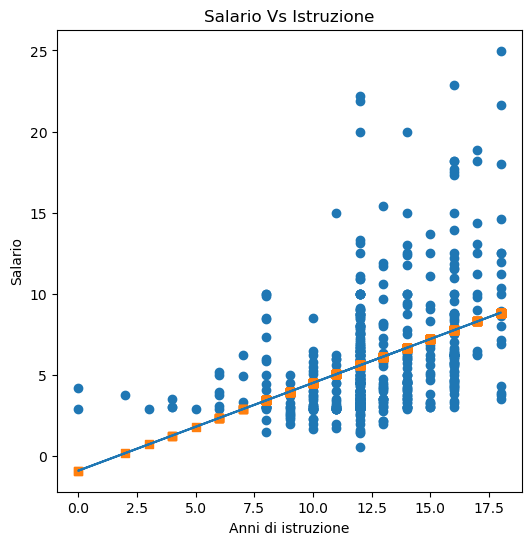

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1*x)
plt.scatter(x, beta_0 + beta_1*x, marker = "s")
plt.title('Salario Vs Istruzione')
plt.xlabel('Anni di istruzione')
plt.ylabel('Salario')
plt.show()

### Problematiche

Nel modello precedente non si tiene conto di altre caratteristiche individuali - come l’esperienza lavorativa, la conoscenza di lingue straniere o competenze tecniche acquisite sul campo - potrebbero influenzare il salario riducendo il peso attribuito all’istruzione

Aggiungiamo controlli: esperienza lavorativa (exper), anni con l'attuale datore di lavoro (tenure), sposato/a.

In [16]:
X_ctrl = df[['educ', 'exper', 'tenure', 'married']]
X_ctrl = sm.add_constant(X_ctrl)

In [18]:
model_ctrl = sm.OLS(y, X_ctrl).fit()
print(model_ctrl.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     60.26
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           7.99e-42
Time:                        10:50:05   Log-Likelihood:                -1333.1
No. Observations:                 526   AIC:                             2676.
Df Residuals:                     521   BIC:                             2697.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8730      0.724     -3.966      0.0

Nel nostro caso, l’associazione tra anni di istruzione e salario medio orario rimane positiva e si rafforza leggermente (coefficiente pari a 0,575). In altri contesti, però, può accadere che l’associazione si riduca o addirittura cambi di segno.